# UNSUPERVISED MACHINE LEARNING: Mall Customer Segmentation Using K-Means Clustering Method

## INTRODUCTION

Customer segmentation is the process of dividing a customer base into smaller groups or segments based on common characteristics such as demographics, behavior, or preferences. Unsupervised machine learning algorithms such as clustering are often used for customer segmentation, as they can automatically identify patterns and similarities in large datasets without the need for labeled data.

K-Means Clustering is a popular algorithm for customer segmentation. It works by dividing the data into a predetermined number of clusters, with each cluster representing a segment of customers that share similar characteristics.

## DATA

* **`Customer ID`**: Id of customer.
* **`Gender`**: The gender of the customers, which are in two categories - Male and Female
* **`Age`**: aThis gives the age of the customers under study.
* **`Annual Income`**: This presents the income of the customers.
* **`Spending Score`**: Score assigned by the mall based on customer behavior and spending nature. This ranges  from 1 to 99.

## HIGHLIGHTS

1. Prepare Data
    1. Import and wrangle dataset
    2. Explore
    3. Split: No target vector

2. Build Model
    1. Iterate: K-means model, choose number of clusters.

3. Communicate Results
    1. Extract Cluster centroids
    2. Side-by-side bar chart


## Prepare Data

### Import libraries and wrangle dataset


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for model
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

In [ ]:
# Define relevant functions

# Define function to load dataset
def load_data(filename: str, sep = ",") -> pd.DataFrame:
    """Define a function that returns dataframe and loads into the python environment
    
    Keyword arguments:
    filename -- str, this takes in the filename and returns it as a dataframe
    sep -- str, this sets the module of the filename to default value of ","
    Return: This returns the loaded file as a pandas dataframe
    """
    data = pd.read_csv(filename, sep=sep)

    # Drop a column
    data.drop(columns="CustomerID", inplace=True)

    # Rename other columns
    ramapper = {"Annual Income (k$)": "Income", "Spending Score (1-100)":"Score"}
    data.rename(columns=ramapper, inplace=True)

    # Return result
    return data


# Define function to plot pie chart
def cat_pie_plot(df) -> 'plots':
    """Returns pie chart for categorical variable

    Params:
        data :pd.DataFrame, returns the loaded data
        Return: This returns the pie chat
    """
    freq = df["Gender"].value_counts()
    var = df["Gender"].value_counts().index
    plt.figure(figsize=[8,4])
    plt.pie(freq, labels=var,autopct="%.1f%%")
    plt.legend()
    plt.title("Pie chart for Gender");


# Define function to plot histogram
def hist_plot(data: pd.DataFrame, features: list[str]) -> 'plots':
    """Returns histogram for numerical features

    Params:
        data :pd.DataFrame, returns the loaded data
        features: list[str], returns list of features
    """
    plt.figure(figsize=(15,10))
    for i, feat in enumerate(features):
        # plt.rcParams.update({'font.size': 14})
        plt.subplot(2,2,i+1)
        axs = sns.histplot(data=data, x=data[feat])
        axs.set_title(f"Histogram for: {feat.title()}")
        axs.set_xlabel(f"{feat.title()}")
        axs.set_ylabel('Frequency')
        plt.xticks(rotation=45)

    plt.tight_layout();


# Define function to plot histogram
def bar_plot_num_cat(data: pd.DataFrame, other, features) -> 'plots':
    """Returns histogram plot for numerical data against categorical feature

    Params:
        data :pd.DataFrame, returns the loaded data
        features: returns list of features
        other: str, returns the categorical variable
    """
    plt.figure(figsize=(15,10))
    for i, feat in enumerate(features):
        plt.subplot(3,1,i+1)
        axs = sns.barplot(data=data, x=f"{other}", y = f"{feat}")
        axs.set_title(f"Bar chart for: {other} Vs. {feat}")
        axs.set_xlabel(f"{other}")
        axs.set_ylabel(f'{feat}')
        plt.xticks(rotation=45)

    plt.tight_layout();


# Define functionto plot scatterplot of numerical variables against categorical variable
def scatterplot_num_cat(data, feat1, feat2,feat3,other):
    plt.figure(figsize=[13,8])

    # First plot
    plt.subplot(2,2,1)
    sns.scatterplot(data=data, x=f"{feat1}", y=f"{feat2}", hue=f"{other}")
    plt.title(f"Scatter plot of: {feat1} Vs {feat2} Vs {other}")
    plt.xlabel(f"{feat1}")
    plt.ylabel(f"{feat2}")
    plt.legend()

    # Second plot
    plt.subplot(2,2,2)
    sns.scatterplot(data=data, x=f"{feat1}", y=f"{feat3}", hue=f"{other}")
    plt.title(f"Scatter plot of: {feat1} Vs {feat3} Vs {other}")
    plt.xlabel(f"{feat1}")
    plt.ylabel(f"{feat3}")
    plt.legend()

    # Third plot
    plt.subplot(2,2,3)
    sns.scatterplot(data=data, x=f"{feat2}", y=f"{feat3}", hue=f"{other}")
    plt.title(f"Scatter plot of: {feat2} Vs {feat3} Vs {other}")
    plt.xlabel(f"{feat2}")
    plt.ylabel(f"{feat3}")

    plt.tight_layout();



def barplot_num_cat2(data, feat1, feat2,feat3,other):
    plt.figure(figsize=[15,15])

    # First plot
    plt.subplot(3,1,1)
    sns.barplot(data=data, x=f"{feat1}", y=f"{feat2}", hue=f"{other}")
    plt.title(f"bar plot of: {feat1} Vs {feat2} Vs {other}")
    plt.xlabel(f"{feat1}")
    plt.ylabel(f"{feat2}")
    plt.xticks(rotation=45)

    # Second plot
    plt.subplot(3,1,2)
    sns.barplot(data=data, x=f"{feat1}", y=f"{feat3}", hue=f"{other}")
    plt.title(f"bar plot of: {feat1} Vs {feat3} Vs {other}")
    plt.xlabel(f"{feat1}")
    plt.ylabel(f"{feat3}")
    plt.xticks(rotation=45)


    # Third plot
    plt.subplot(3,1,3)
    sns.barplot(data=data, x=f"{feat2}", y=f"{feat3}", hue=f"{other}")
    plt.title(f"Bar plot of: {feat2} Vs {feat3} Vs {other}")
    plt.xlabel(f"{feat2}")
    plt.ylabel(f"{feat3}")
    plt.xticks(rotation=45)


    plt.tight_layout();


# Define function to convert categorical variable to numerical variable
def converter(data, feat):
    mapper = {"Female":0, "Male":1}
    data[feat] = data[feat].map(mapper) 

    return data


# Define function to plot kmeans cluster for the final model
def cluster_plot(data, feat1, feat2, feat3, labels):
    plt.figure(figsize=[13,8])

    # First plot
    plt.subplot(2,2,1)
    sns.scatterplot(data=data, x=f"{feat1}", y=f"{feat2}", hue=labels, palette="deep")
    plt.title(f"Scatter plot of: {feat1} Vs {feat2}")
    plt.xlabel(f"{feat1}")
    plt.ylabel(f"{feat2}")
    plt.legend()
    plt.legend(title="Clusters")

    # Second plot
    plt.subplot(2,2,2)
    sns.scatterplot(data=data, x=f"{feat1}", y=f"{feat3}", hue=labels, palette="deep")
    plt.title(f"Scatter plot of: {feat1} Vs {feat3}")
    plt.xlabel(f"{feat1}")
    plt.ylabel(f"{feat3}")
    plt.legend()
    plt.legend(title="Clusters")


    # Third plot
    plt.subplot(2,2,3)
    sns.scatterplot(data=data, x=f"{feat2}", y=f"{feat3}", hue=labels, palette="deep")
    plt.title(f"Scatter plot of: {feat2} Vs {feat3}")
    plt.xlabel(f"{feat2}")
    plt.ylabel(f"{feat3}")
    plt.legend(title="Clusters")

    plt.tight_layout();



# Define function for plots of elbow method
def elbow_plot(n_cluster, silhouette_scores, inertia_errors):
    plt.figure(figsize=[10,5])

    plt.subplot(1,2,1)
    sns.lineplot(x=n_cluster, y=inertia_errors)
    plt.title("K-Means Model: Inertia vs Number of Clusters")
    plt.xlabel("No of clusters")
    plt.ylabel("inertia")

    plt.subplot(1,2,2)
    sns.lineplot(x=n_cluster, y=silhouette_scores)
    plt.title("K-Means Model: Silhouette Scores vs Number of Clusters")
    plt.xlabel("No of clusters")
    plt.ylabel("Silhouette Scores")

    plt.tight_layout();


In [ ]:
# Load dataset
df = load_data(filename="Mall_Customers.csv")

# Check the shape of the dataset
print(df.shape)
# Inspect dataset
df.head()

(200, 4)


,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# Get the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


### Explore

In this section, I intended the explore the dataset using visualization to examine patterns.

#### Explore Data by Univariate 

In [ ]:
# Separating variables

# Get numerical variables
num_var = df.select_dtypes("number")

# Get categorical variable
cat_var = df.select_dtypes("object")

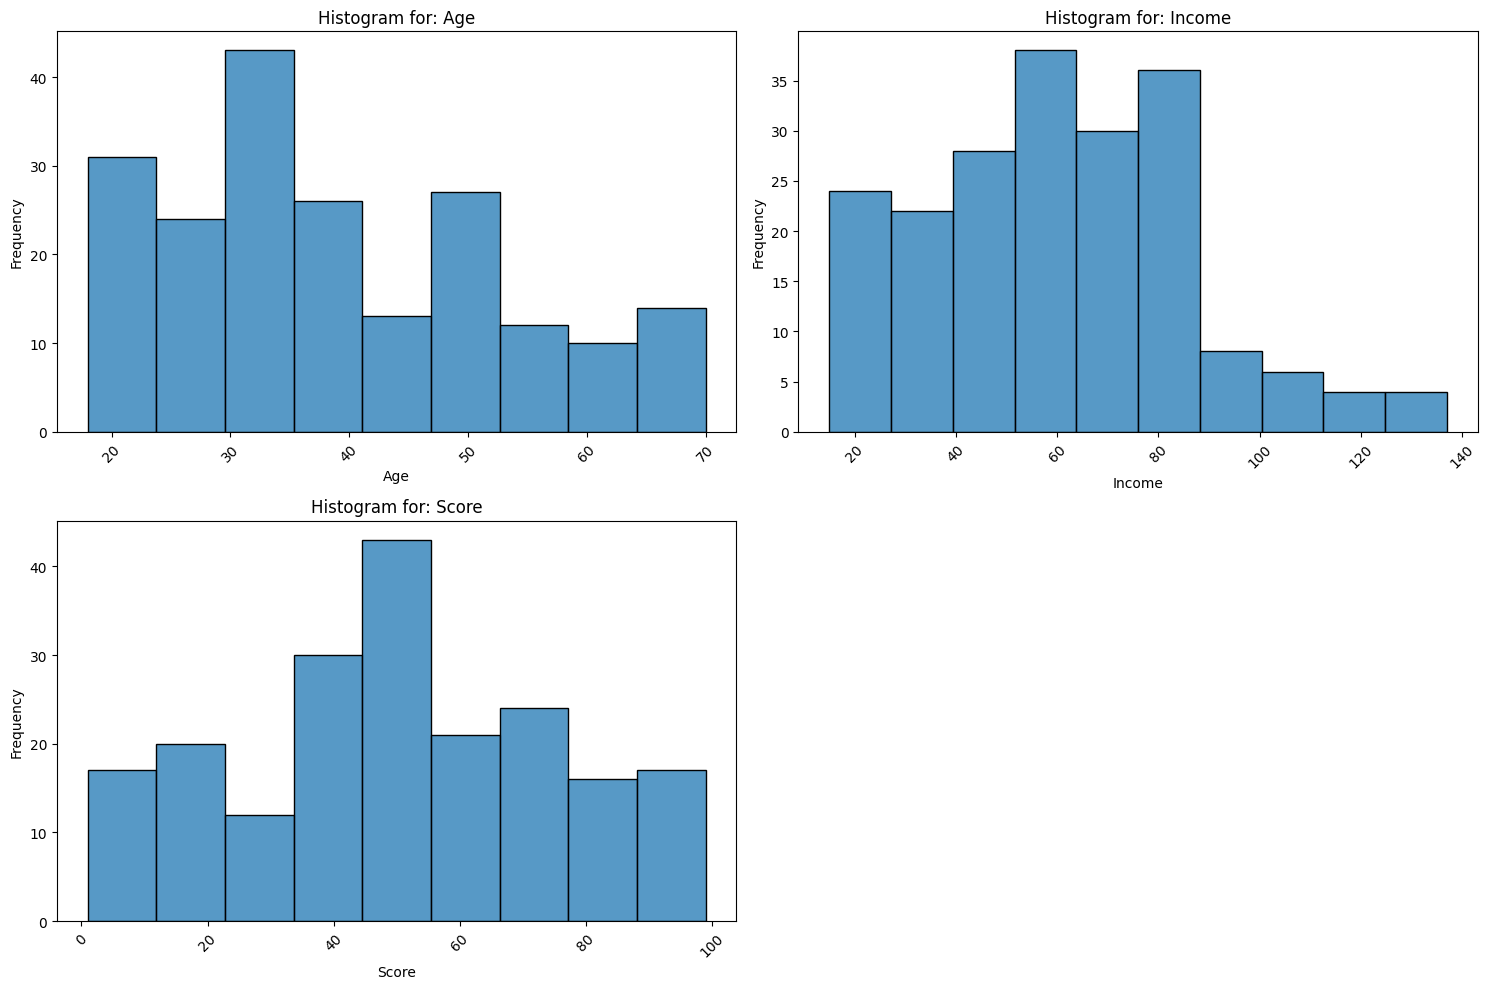

In [ ]:
# Plot histogram
hist_plot(data=df, features=num_var)

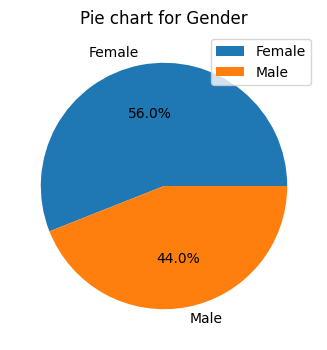

In [ ]:
# Plot pie chart
cat_pie_plot(df=df)

#### Bivariate Plot

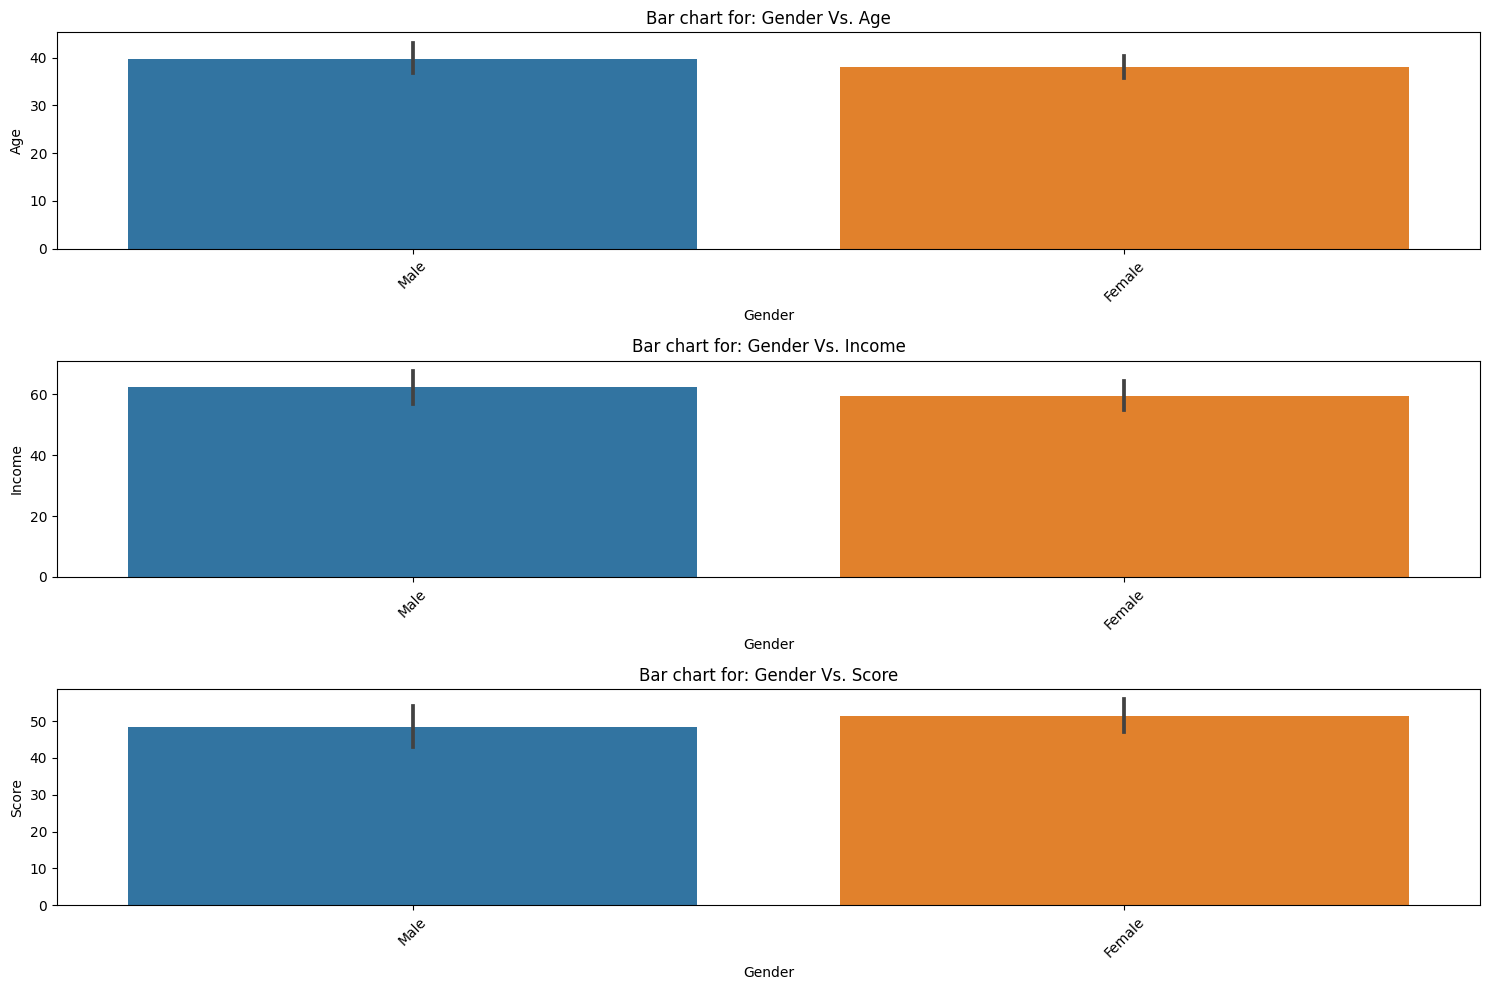

In [ ]:
# Bar chart for bivariate
bar_plot_num_cat(data=df, features=num_var.columns, other="Gender")

#### Multivariate Plot

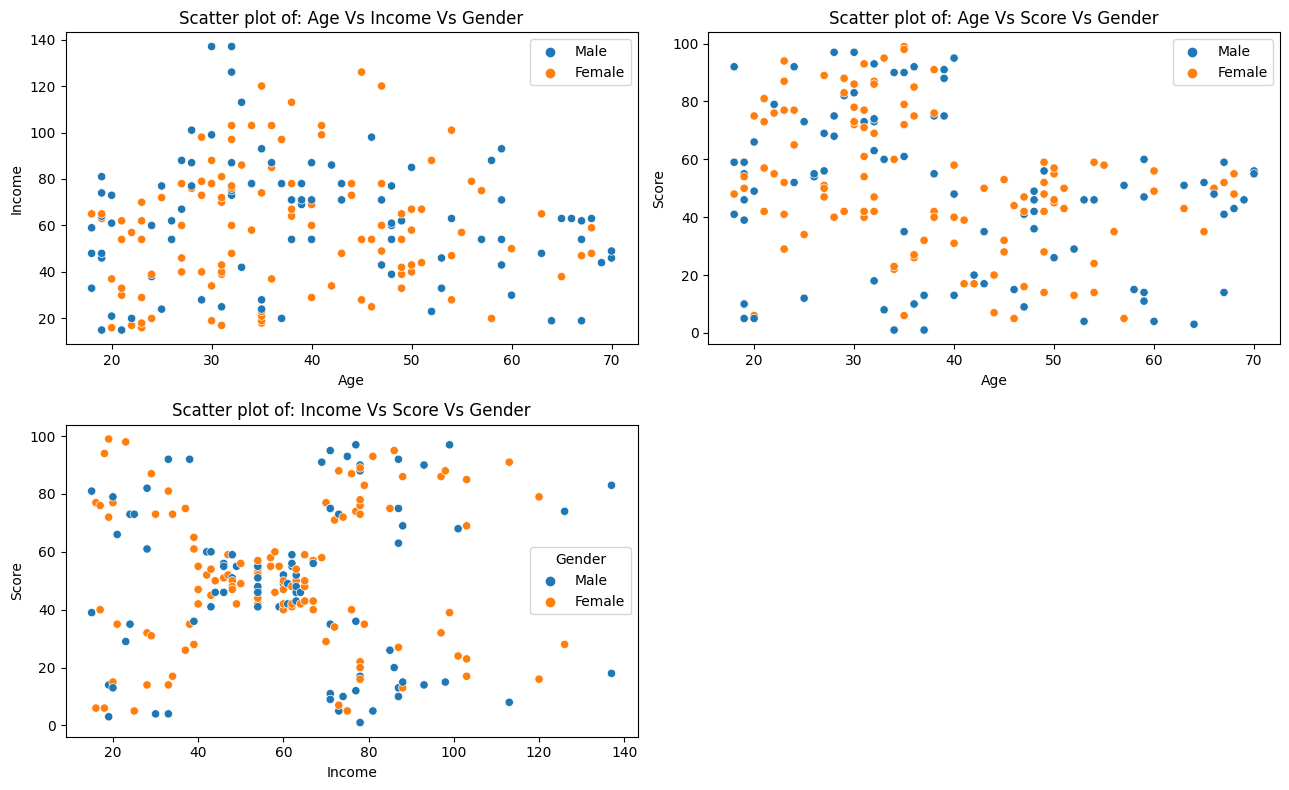

In [ ]:
# Multivariate scatterplot
scatterplot_num_cat(data=df, feat1="Age", feat2="Income", feat3="Score", other="Gender")

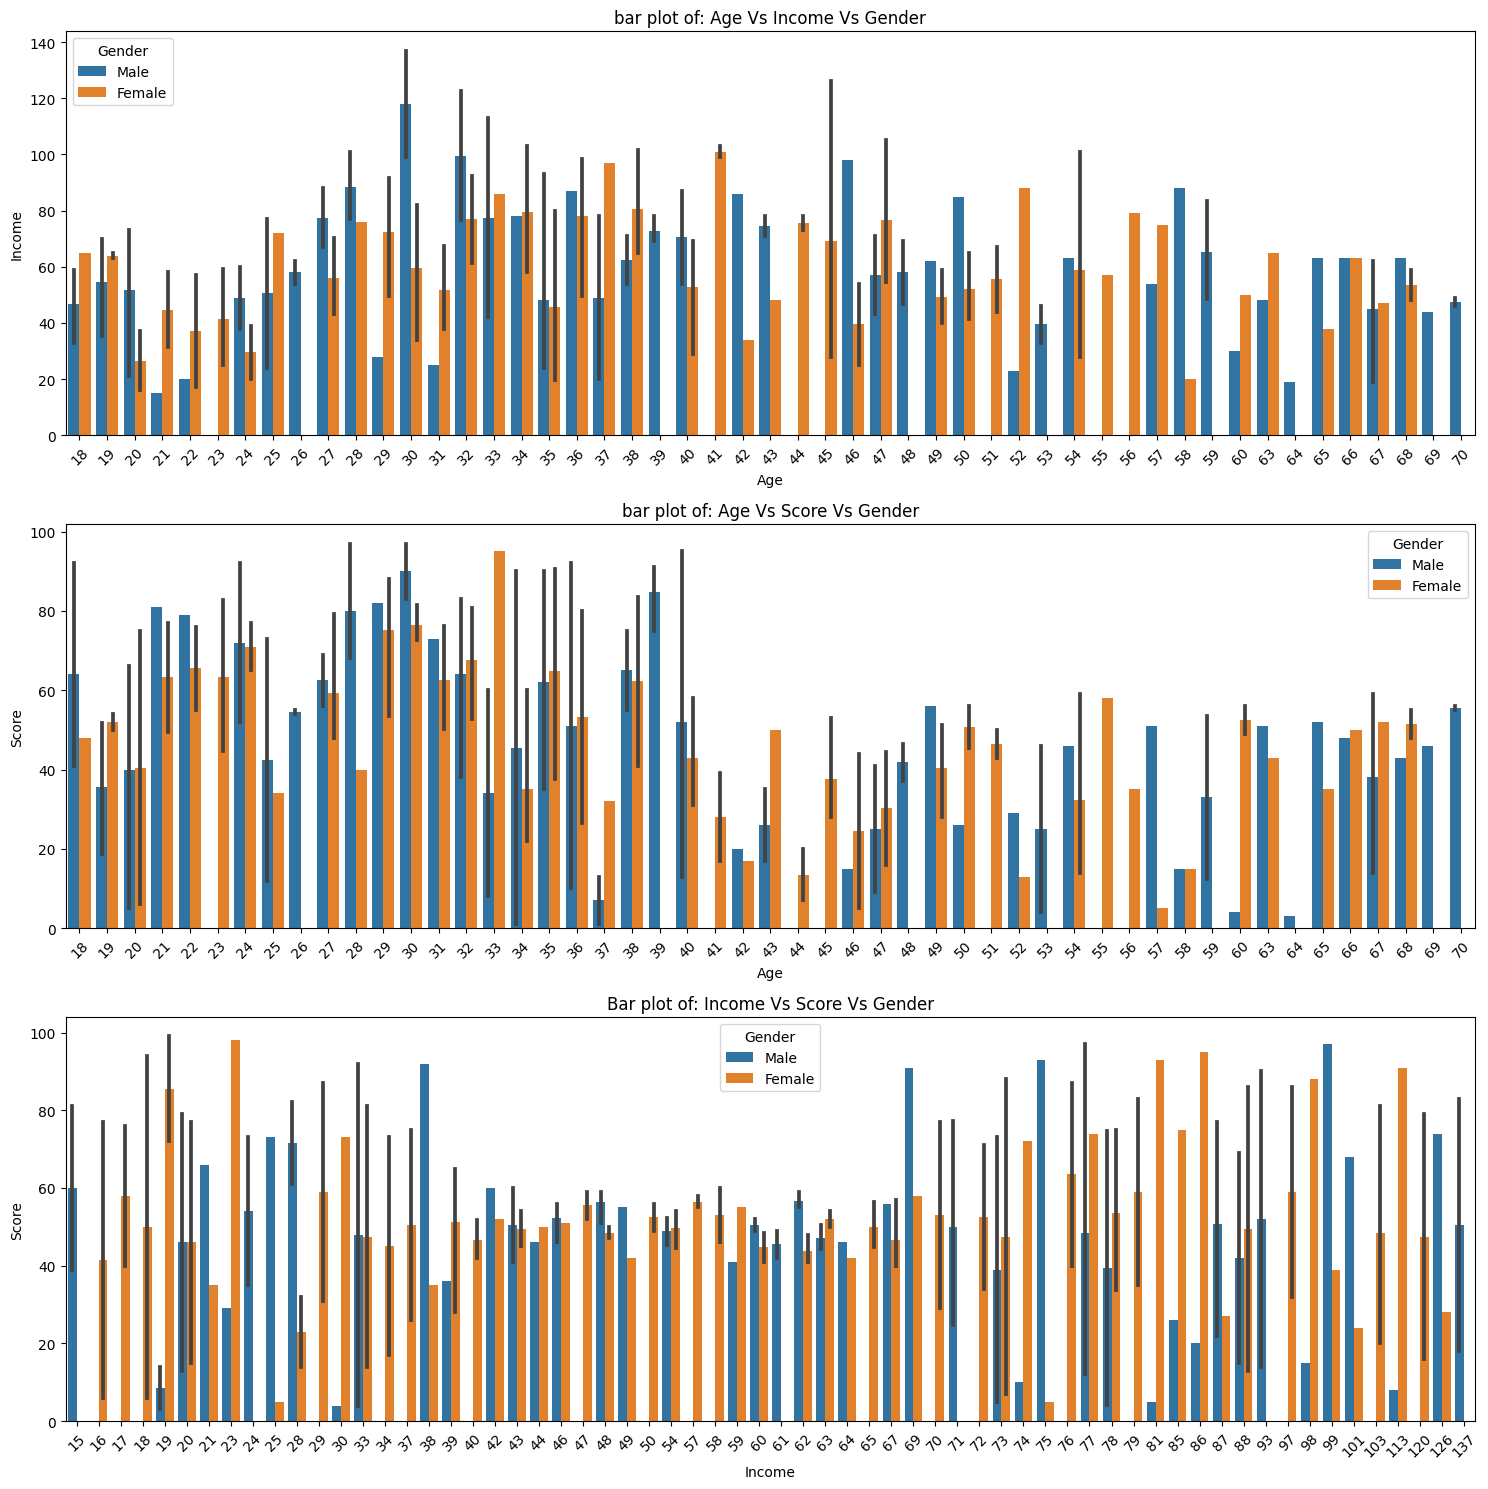

In [ ]:
barplot_num_cat2(data=df, feat1="Age", feat2="Income", feat3="Score", other="Gender")

**`Observations:`**

From the plots given above, the following can be drawn:

1. There seems to be be special clusters of customers along the `top-left` and `bottom-right` for the plot of score vs. age by gender.
2. Scatter plot of score against age by gender, there seems to be `five` special clusters of customers along `top-right`, `top-left`, `bottom-right`, `bottom-left` and `centre` of the locations.

**Preprocess data**

In [12]:
df = converter(df, feat="Gender")
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [13]:
df.shape

(200, 4)

### Split dataset

This is just renaming the dataframe to `X` feature variables as unsupervised machine learning does not have target or lable variable.

In [14]:
X = df
X.shape

(200, 4)

## Build Model

### Iterate Model: K-Means Clustering

In this section, we'll try to train a `K-Means` model by determining the best cluster using the scores from `inertia` and `silhouette` using `elbow` method.

In [15]:
# Determine the best cluster for the model using for-loop
n_cluster = range(2,15)
inertia_errors = []
silhouette_scores = []

# Using `for` loop to train model and calculate the inertia and silhouette score.
for k in n_cluster:
    # Instantiate model
    model = Pipeline(
        steps=[
            ("standardscaler", StandardScaler()),
            ("kmeans", KMeans(n_clusters=k, random_state=42))
        ]
    )

    # Fit model
    model.fit(X)

    # Get the inertia
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    # Get silhouette sore
    silhouette_scores.append(silhouette_score(X, model.named_steps["kmeans"].labels_))

print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [588.8026767824936, 476.7875544135159, 386.7147857740688]

Silhouette Scores: [0.27616270812085714, 0.11671715822050448, -0.006413021720677972]


In [16]:
# Store result in dataframe
metrics = {
    "inertia_errors": inertia_errors,
    "silhouette_scores":silhouette_scores
}

eval_metrics = pd.DataFrame(data=metrics)
# Rename the index column
eval_metrics.index.rename('index', inplace=True)
# Re-number the index column
eval_metrics.index +=1
eval_metrics

,inertia_errors,silhouette_scores
index,,
1,588.802677,0.276163
2,476.787554,0.116717
3,386.714786,-0.006413
4,325.109983,0.060659
5,275.858843,0.067250
6,236.204947,0.046016
7,199.716626,-0.000887
8,174.193096,0.021576
9,152.086763,0.046949


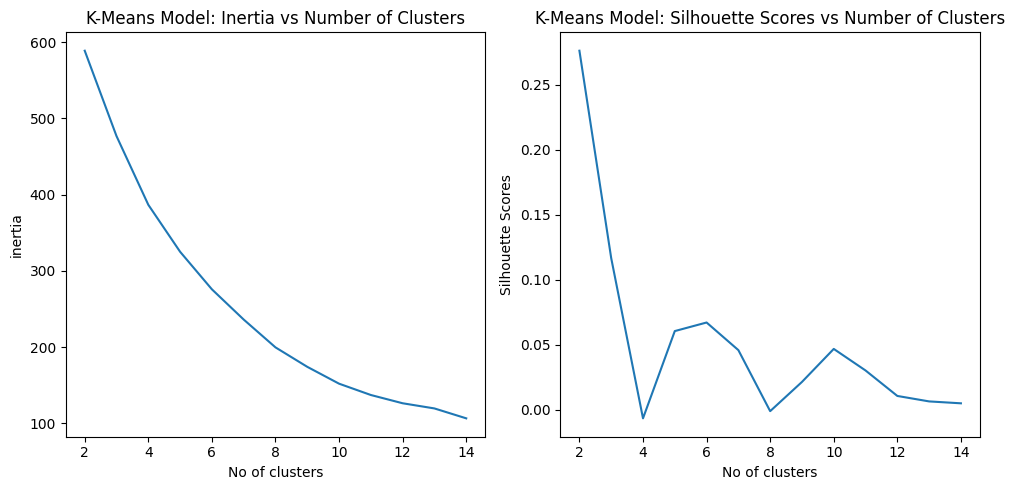

In [27]:
# Plot of elbow method to determine the number of clusters for k-means model
elbow_plot(n_cluster, silhouette_scores, inertia_errors)

**Observation**

From the result of the elbow plots using inertia errors and silhouette scores, the best scores occur at cluster 4. Hence, this will be used to fit the final model.

Also, the 4 clusters are labelled from `0 to 3`.

In [19]:
# Fitting the final model
model_final = Pipeline(steps=[
            ("standardscaler", StandardScaler()),
            ("kmeans", KMeans(n_clusters=4, random_state=42))
            ]
            )

# Fit the model
model_final.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [20]:
# Getting the labels of model
labels = model_final.named_steps["kmeans"].labels_
print(labels[:5])

[3 3 2 1 1]


In [39]:
# Determine the unique labels
df_labels = pd.DataFrame(data=labels)
df_labels.rename(columns={0:"labels"}, inplace=True)
df_labels["labels"].unique()

array([3, 2, 1, 0])

In [40]:
# Getting the centroids
centroids = model_final.named_steps["kmeans"].cluster_centers_
print(centroids)

[[ 1.12815215  0.75982983  0.07086791 -0.81492926]
 [-0.88640526 -0.74719196 -0.03409802  0.67876434]
 [-0.88640526  0.6644943  -0.06648421 -0.59855788]
 [ 1.12815215 -0.76072691  0.05496398  0.83369302]]


## Communicate Result

Reduce the dimensionality of the dataset into two by using the `PCA` transformer


In [41]:
# Instantiate the PCA class
pca = PCA(n_components=2, random_state=42)

# Fit and transform the dataset
X_tr = pca.fit_transform(X, )

# Put the transformed data into a frame
X_pca = pd.DataFrame(X_tr, columns=["PC1","PC2"])

# Investigate the dataframe
X_pca.head()


,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412


In [42]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
    data_frame=X_pca,
    x='PC1',
    y='PC2',
    color=labels.astype(str),
    title="PCA Representation of Clusters"
)
fig.update_layout(xaxis_title="PC1",yaxis_title="PC2")


fig.show()

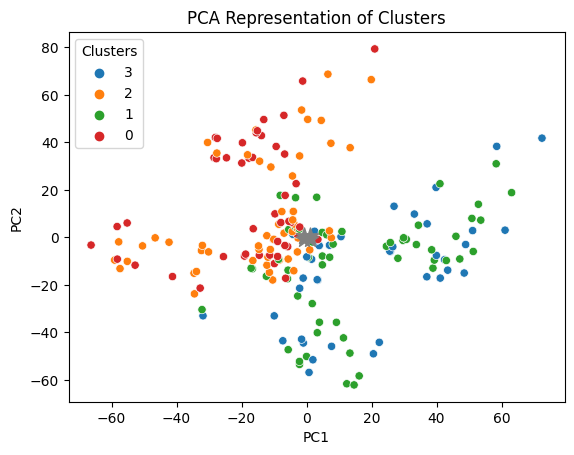

In [43]:
# Plot using seaborn
sns.scatterplot(data=X_pca, x="PC1", y="PC2", hue=labels.astype(str))
plt.scatter(x=centroids[:, 0],y=centroids[:, 1],color='grey',marker='*',s=150)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Representation of Clusters")
plt.legend(title="Clusters");

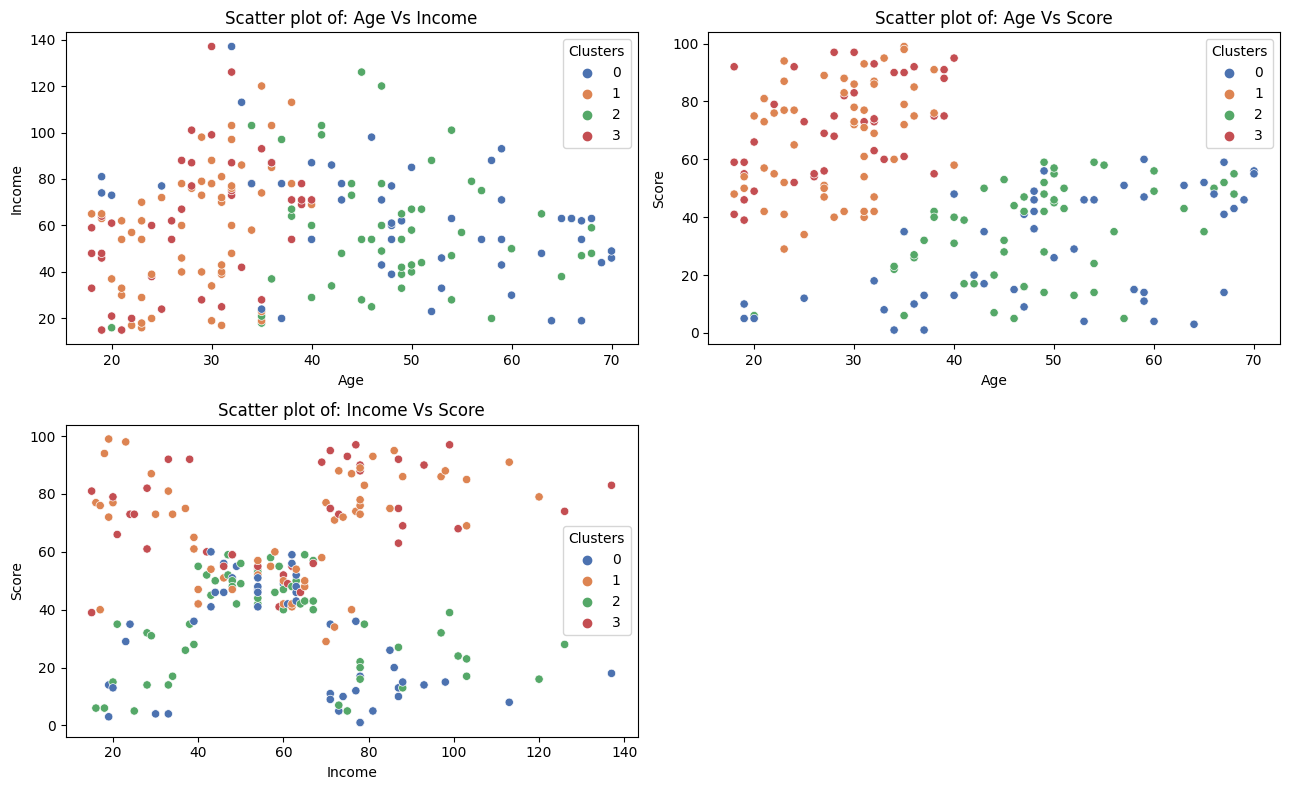

In [44]:
# Plot clusters
cluster_plot(data=df, feat1="Age", feat2="Income", feat3="Score", labels=labels)